In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Using this dataset, we answered multiple questions with Python in our Project.

Q. 1) For 'House of Cards', what is the Show Id and Who is the Director of this show ?

Q. 2) In which year the highest number of the TV Shows & Movies were released ? Show with Bar Graph.

Q. 3) How many Movies & TV Shows are in the dataset ? Show with Bar Graph.

Q. 4) Show all the Movies that were released in year 2000.

Q. 5) Show only the Titles of all TV Shows that were released in India only.

Q. 6) Show Top 10 Directors, who gave the highest number of TV Shows & Movies to Netflix ?

Q. 7) Show all the Records, where "Category is Movie and Type is Comedies" or "Country is United Kingdom".

Q. 8) In how many movies/shows, Tom Cruise was cast ?

Q. 9) What are the different Ratings defined by Netflix ?
Q. 9.1) How many Movies got the 'TV-14' rating, in Canada ?
Q. 9.2) How many TV Shows got the 'R' rating, after year 2018 ?

Q. 10) What is the maximum duration of a Movie/Show on Netflix ?

Q. 11) Which individual country has the Highest No. of TV Shows ?

Q. 12) How can we sort the dataset by Year ?

Q. 13) Find all the instances where: Category is 'Movie' and Type is 'Dramas' or Category is 'TV Show' & Type is 'Kids' TV'.

In [5]:
df = pd.read_csv('/content/Netflix Dataset.csv')
df.head(1)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...


In [6]:
df.shape

(7789, 11)

In [7]:
df.describe()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
count,7789,7789,7789,5401,7071,7282,7779,7782,7789,7789,7789
unique,7787,2,7787,4050,6831,681,1565,14,216,492,7769
top,s6621,Movie,The Lost Okoroshi,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,2,5379,2,18,18,2556,118,2865,1608,334,3


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [9]:
df['Category'] = df['Category'].astype('category')
df['Country'] = df['Country'].astype('category')
df['Rating'] = df['Rating'].astype('category')
df['Type'] = df['Type'].astype('category')
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Show_Id       7789 non-null   object        
 1   Category      7789 non-null   category      
 2   Title         7789 non-null   object        
 3   Director      5401 non-null   object        
 4   Cast          7071 non-null   object        
 5   Country       7282 non-null   category      
 6   Release_Date  7691 non-null   datetime64[ns]
 7   Rating        7782 non-null   category      
 8   Duration      7789 non-null   object        
 9   Type          7789 non-null   category      
 10  Description   7789 non-null   object        
dtypes: category(4), datetime64[ns](1), object(6)
memory usage: 514.0+ KB


In [11]:
df.isna().sum()

,0
Show_Id,0
Category,0
Title,0
Director,2388
Cast,718
Country,507
Release_Date,98
Rating,7
Duration,0
Type,0


In [12]:
df.duplicated().sum()

np.int64(2)

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df['Director'] = df['Director'].fillna('Unknown')

In [15]:
df['Cast'] = df['Cast'].fillna('Unknown Cast')

In [16]:
df['Country'] = df['Country'].cat.add_categories(['Unknown']).fillna('Unknown')

In [17]:
median_date = df['Release_Date'].median()
df['Release_Date'] = df['Release_Date'].fillna(median_date)

In [18]:
df['Rating'] = df['Rating'].cat.add_categories(['Unknown Rating']).fillna('Unknown Rating')

In [19]:
df.isna().sum()

,0
Show_Id,0
Category,0
Title,0
Director,0
Cast,0
Country,0
Release_Date,0
Rating,0
Duration,0
Type,0


In [20]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

/tmp/ipython-input-242626680.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [21]:
df[['Duration_Int', 'Duration_Unit']] = df['Duration'].str.extract(r'(\d+)\s*(\w+)')
df['Duration_Int'] = pd.to_numeric(df['Duration_Int'], errors='coerce')

In [22]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df['Year'] = df['Release_Date'].dt.year

In [23]:
# Q.1) For 'House of Cards', what is the Show Id and Who is the Director of this show ?
house_of_cards = df[df['Title'] == 'House of Cards']
house_of_cards[['Show_Id','Title', 'Director']]

,Show_Id,Title,Director
2832,s2833,House of Cards,"Robin Wright, David Fincher, Gerald McRaney, J..."


In [24]:
# Q.2) In which year the highest number of the TV Shows & Movies were released ? Show with Bar Graph.
new_show = df['Year']
new_show.value_counts().head()

,count
Year,
2019,2234
2020,2008
2018,1661
2017,1201
2016,432


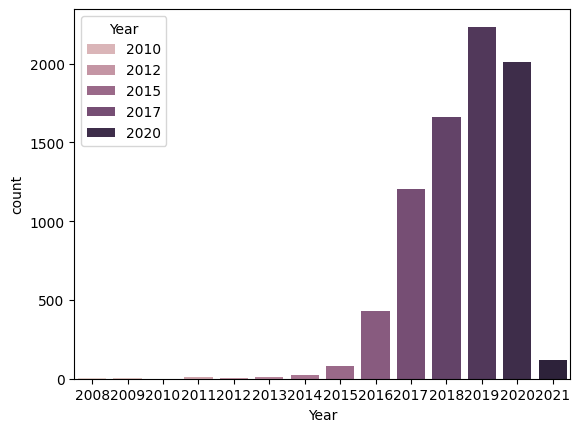

In [25]:
sns.countplot(data=df, x='Year', hue='Year')
plt.show()

In [26]:
# Q.3) How many Movies & TV Shows are in the dataset ? Show with Bar Graph.
df['Category'].value_counts()

,count
Category,
Movie,5377
TV Show,2410


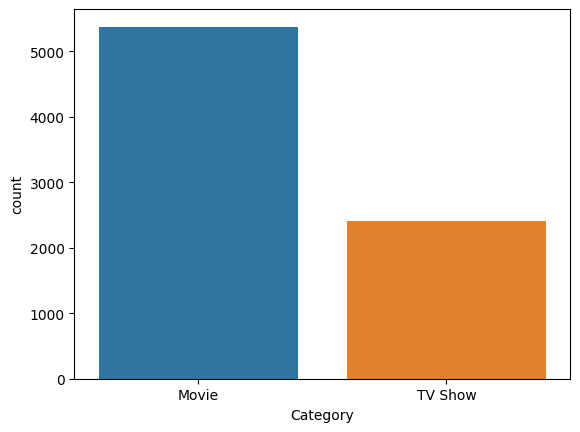

In [27]:
sns.countplot(data=df, x='Category',hue='Category')
plt.show()

In [28]:
# Q. 4) Show all the Movies that were released in year 2000.
df[(df['Category'] == 'Movie') & (df['Year']==2000)]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Duration_Int,Duration_Unit,Year


In [29]:
# Q. 5) Show only the Titles of all TV Shows that were released in India only.
new_title = df[(df['Category']=='TV Show') & (df['Country']== 'India')]
new_title['Title']

,Title
86,21 Sarfarosh: Saragarhi 1897
132,7 (Seven)
340,Agent Raghav
364,Akbar Birbal
533,Anjaan: Rural Myths
...,...
6249,The Creative Indians
6400,The Golden Years with Javed Akhtar
6469,The House That Made Me
7294,Typewriter


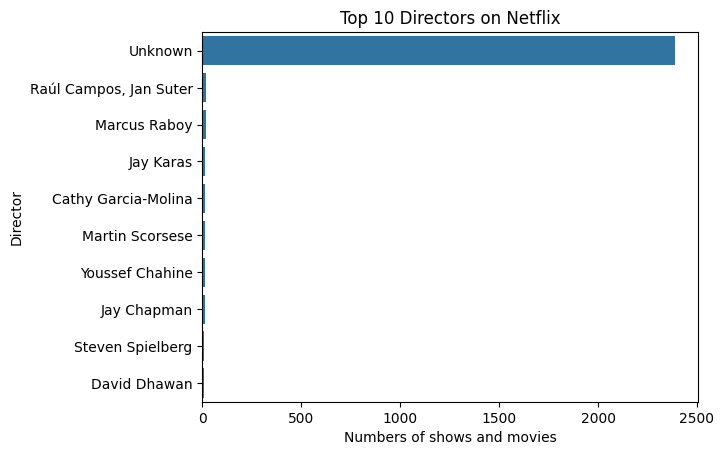

In [30]:
# Q. 6) Show Top 10 Directors, who gave the highest number of TV Shows & Movies to Netflix ?
top_director = df['Director'].value_counts().head(10)
sns.barplot(x=top_director.values, y=top_director.index)
plt.xlabel('Numbers of shows and movies')
plt.ylabel('Director')
plt.title('Top 10 Directors on Netflix')
plt.show()

In [31]:
df.head(1)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Duration_Int,Duration_Unit,Year
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,4,Seasons,2020


In [32]:
# Q. 7) Show all the Records, where "Category is Movie and Type is Comedies" or "Country is United Kingdom".

only_uk = df[
    ((df['Category'] == 'Movie') & (df['Type'] == 'Comedies') & (df['Country'] == 'United Kingdom'))]
only_uk = df[df['Country'] == 'United Kingdom']
only_uk.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Duration_Int,Duration_Unit,Year
19,s20,Movie,'89,Unknown,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,2018-05-16,TV-PG,87 min,Sports Movies,"Mixing old footage with interviews, this is th...",87,min,2018
58,s59,TV Show,100% Hotter,Unknown,"Daniel Palmer, Melissa Sophia, Karen Williams,...",United Kingdom,2019-11-01,TV-14,1 Season,"British TV Shows, International TV Shows, Real...","A stylist, a hair designer and a makeup artist...",1,Season,2019


In [33]:
# Q. 8) In how many movies/shows, Tom Cruise was cast ?
tom_cruise = df[df['Cast'].str.contains('Tom Cruise', na=False)]
len(tom_cruise)

2

In [34]:
# Q. 9) What are the different Ratings defined by Netflix ?
sorted(df['Rating'].dropna().unique())

['G',
 'NC-17',
 'NR',
 'PG',
 'PG-13',
 'R',
 'TV-14',
 'TV-G',
 'TV-MA',
 'TV-PG',
 'TV-Y',
 'TV-Y7',
 'TV-Y7-FV',
 'UR',
 'Unknown Rating']

In [35]:
#  Q. 9.1) How many Movies got the 'TV-14' rating, in Canada ?
rating=df[(df['Category']=='Movies') & (df['Rating']=='TV-14') & (df['Country']=='Canada')]
len(rating)

0

In [36]:
# Q. 9.2) How many TV Shows got the 'R' rating, after year 2018 ?
year = df[(df['Category']=='TV Shows') & (df['Rating']=='R') &
          (df['Year']>2018)]
len(year)

0

In [37]:
df.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Duration_Int,Duration_Unit,Year
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,4,Seasons,2020
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,93,min,2016


In [38]:
# Q.10) What is the maximum duration of a Movie/Show on Netflix ?
df['Duration_Int'].max()

312

In [39]:
# Q.11) Which individual country has the Highest No. of TV Shows ?
tv_shows = df[df['Category']=='TV Show']
top_country = tv_shows['Country'].value_counts().idxmax()
tv_shows['Country'].value_counts().max()

705

In [40]:
# Q. 12) How can we sort the dataset by Year ?
df.sort_values(by='Year', ascending=True)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Duration_Int,Duration_Unit,Year
7115,s7114,Movie,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,2008-01-01,TV-MA,81 min,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Sea...",81,min,2008
1765,s1766,TV Show,Dinner for Five,Unknown,Unknown Cast,United States,2008-02-04,TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",1,Season,2008
5766,s5766,Movie,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,2009-11-18,TV-MA,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",29,min,2009
3248,s3249,Movie,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,2009-05-05,TV-MA,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,104,min,2009
3840,s3841,Movie,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,2010-11-01,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",84,min,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7553,s7552,Movie,What Happened to Mr. Cha?,Kim Dong-kyu,"Cha In-pyo, Cho Dal-hwan, Song Jae-ryong",South Korea,2021-01-01,TV-MA,102 min,"Comedies, International Movies","With the peak of his career long behind him, a...",102,min,2021
5850,s5850,Movie,Striptease,Andrew Bergman,"Demi Moore, Burt Reynolds, Armand Assante, Vin...",United States,2021-01-01,R,117 min,"Comedies, Dramas",A former FBI employee works as a stripper to f...,117,min,2021
5060,s5060,Movie,Radium Girls,"Lydia Dean Pilcher, Ginny Mohler","Joey King, Abby Quinn, Cara Seymour, Scott She...",United States,2021-01-16,TV-14,103 min,"Dramas, Independent Movies",When the women at a radium factory begin to fa...,103,min,2021
6479,s6478,TV Show,The Idhun Chronicles,Maite Ruiz De Austri,"Michelle Jenner, Itzan Escamilla, Sergio Mur, ...",Spain,2021-01-08,TV-14,2 Seasons,"Anime Series, International TV Shows, Spanish-...",A boy suddenly orphaned fights his parents' ki...,2,Seasons,2021


In [41]:
df.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Duration_Int,Duration_Unit,Year
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,4,Seasons,2020
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,93,min,2016


In [42]:
# from google.colab import files
# df.to_csv("netflix_cleaned.csv", index=False, encoding='utf-8-sig')
# files.download("netflix_cleaned.csv")


In [43]:
# from google.colab import drive
# drive.mount('/content/drive')

# # Path in your Google Drive
# file_path = "/content/drive/My Drive/netflix_cleaned.csv"
# df.to_csv(file_path, index=False, encoding='utf-8-sig')